In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-1.59888337e-03, -1.11370830e+00],
       [-3.18200065e-01,  1.80447702e-02],
       [-1.23257295e-01,  1.11912510e+00],
       ...,
       [ 1.80882842e+00, -4.72585389e-01],
       [-2.00270463e-01,  1.63164631e-01],
       [-9.76620205e-01,  5.56135050e-01]])

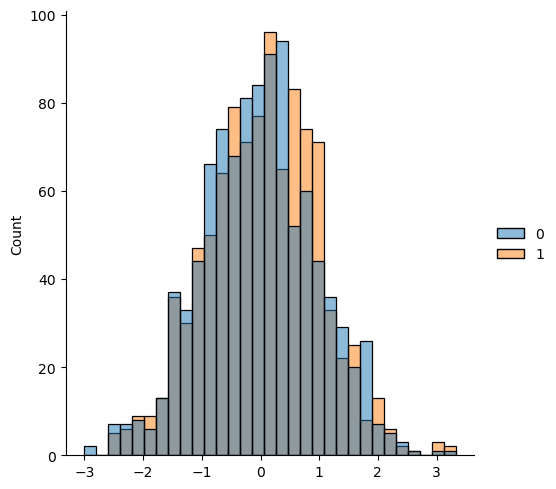

In [5]:
sns.displot(X)

In [6]:
#y


In [7]:
pd.DataFrame(X)[0]

0     -0.001599
1     -0.318200
2     -0.123257
3      0.427800
4      1.052391
         ...   
995   -0.708354
996   -1.020538
997    1.808828
998   -0.200270
999   -0.976620
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

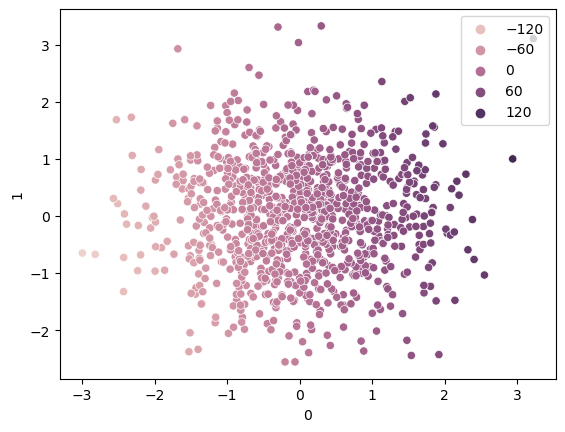

In [8]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [10]:
from sklearn.svm import SVR

In [11]:
svr = SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[44.45954725,  8.41193595]])

In [14]:
##Prediction
y_pred = svr.predict(X_test)

In [15]:
y_pred

array([-6.69627389e+01, -2.87807366e+01, -2.23782674e+01, -7.73744392e+00,
        2.64285186e+01, -5.37146428e+01, -1.34074041e+01, -8.91630093e+01,
        1.39325396e+02,  2.58953955e+01,  2.19180929e+01,  1.66471069e+01,
       -2.86755100e+01,  3.04045038e+01, -2.34907512e+01,  1.33742578e+01,
       -1.58629378e+01,  3.11471742e+00,  2.31135018e+01,  1.24860846e+01,
       -8.05623434e+01, -4.52461517e+00,  3.24644117e+01,  1.42377717e+01,
       -5.79000559e+01,  2.13770178e+01,  4.53562751e+01, -2.70924605e+01,
        9.27595481e+01,  5.58018039e+01, -1.93066077e+01,  1.97904644e+01,
       -6.16612313e+01,  4.42889853e+00, -4.09835238e+01, -1.30303783e+01,
       -1.75298861e+01,  4.01320645e+00,  7.48180975e+00,  2.89465191e+01,
       -2.83588556e+01,  2.02591075e+01, -3.57883507e+01,  9.51808502e+01,
       -2.23252876e+01, -7.15283340e-01,  3.39088842e+01,  4.37031348e+01,
       -4.71298475e+01, -2.04203926e+01, -2.82107354e+01, -4.83142990e+01,
        1.07212872e+01, -

In [16]:
from sklearn.metrics import r2_score

In [17]:
print (r2_score(y_pred,y_test))

0.9944992124738397


#### Hyperparameter Tuning with SVR

In [18]:
from sklearn.model_selection import GridSearchCV

##defining parameter range
param_grid = {
    'C' : [0.1,1,10,100,1000],
    'kernel' : ['linear'],
    'gamma' : [1,0.1,0.001,0.0001],
    'epsilon' : [0.1,0.2,0.3]
}

In [19]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv = 5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
y_pred = grid.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9946177420205989
